# TP1 - VP1
### Andrés Merli

# Parte 1 (imágenes en /white_patch y /coord_cromaticas):
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch

In [160]:
#%matplotlib inline  

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#### Implementamos función con algoritmo de coordendas cromáticas

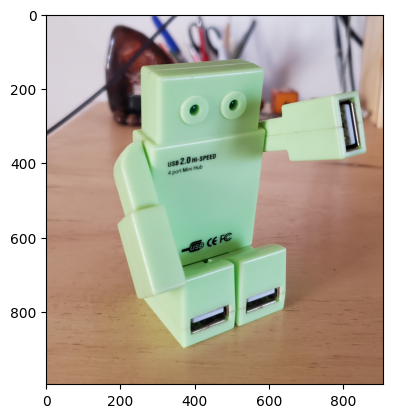

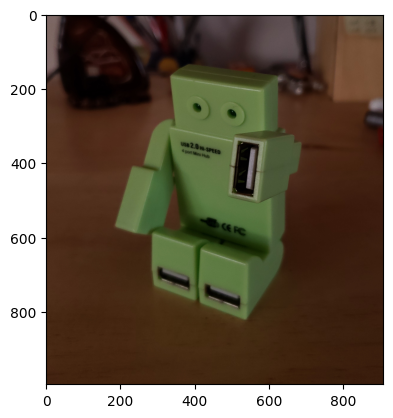

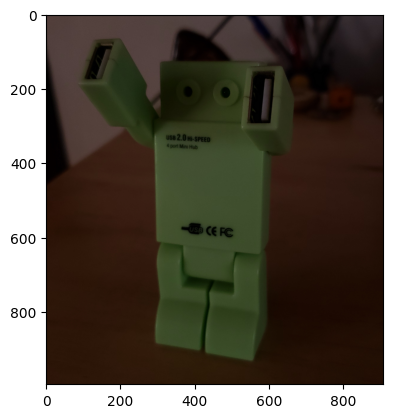

In [161]:
#Levantamos con OpenCV las 3 imagenes para aplicar Coordenadas Cromáticas y pasamos de BGR a RGB

img_cc1 = cv.imread('coord_cromaticas/CoordCrom_1.png')
img_cc1 = cv.cvtColor(img_cc1, cv.COLOR_BGR2RGB)
plt.imshow(img_cc1)
plt.show()
img_cc2 = cv.imread('coord_cromaticas/CoordCrom_2.png')
img_cc2 = cv.cvtColor(img_cc2, cv.COLOR_BGR2RGB)
plt.imshow(img_cc2)
plt.show()
img_cc3 = cv.imread('coord_cromaticas/CoordCrom_3.png')
img_cc3 = cv.cvtColor(img_cc3, cv.COLOR_BGR2RGB)
plt.imshow(img_cc3)
plt.show()

In [162]:
#definimos una función para implementar algoritmo de pasaje a coordenadas cromáticas

def coord_crom(input_image:np.ndarray) -> np.ndarray:
    """
    Toma como parámetro de entrada una imagen RGB y aplica la transformación a coordendas cromáticas, devuelve una imagen transformada
    """
    #aplicamos operaciones de numpy para evitar loops reduciendo los tiempos de ejecución
    suma_canales = input_image.sum(axis=2)
    suma_broadcasted = suma_canales[:, :, np.newaxis]
    img_coord_crom = input_image/(suma_broadcasted+0.01)
    img_ccrom_norm = np.uint8(img_coord_crom*255)
    print(img_ccrom_norm.shape)
    plt.imshow(img_ccrom_norm)
    plt.show()
    return img_ccrom_norm
    

### Aplicamos la función creada a cada una de las imagenes de la carpeta coord_cromaticas

(996, 908, 3)


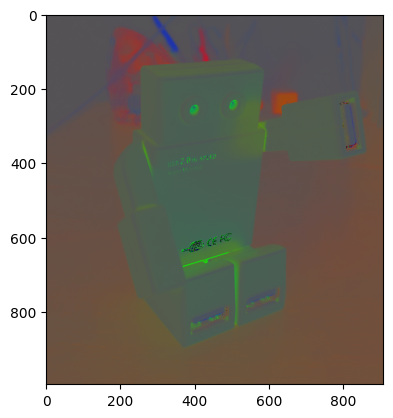

In [163]:
img_cc1_ccrom = coord_crom(img_cc1)

(996, 908, 3)


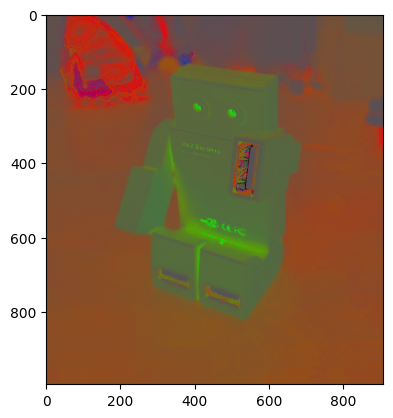

In [164]:
img_cc2_ccrom = coord_crom(img_cc2)

(996, 908, 3)


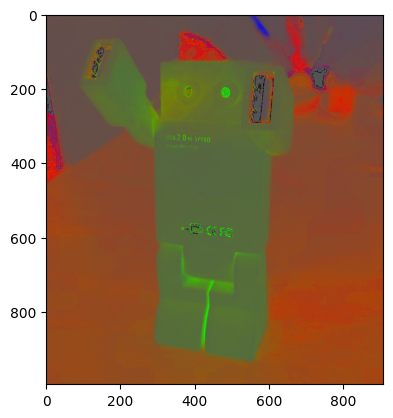

In [165]:
img_cc3_ccrom = coord_crom(img_cc3)

## White Patch

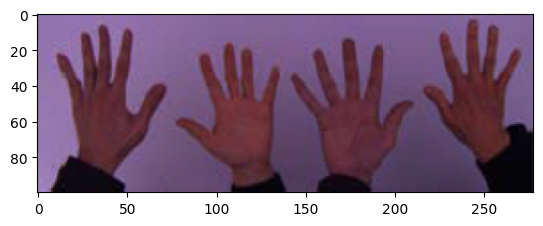

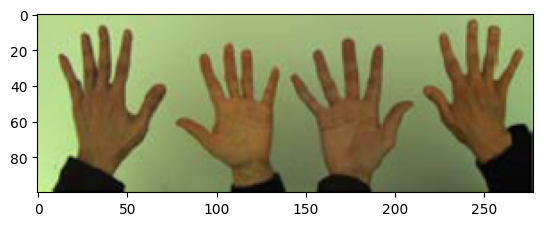

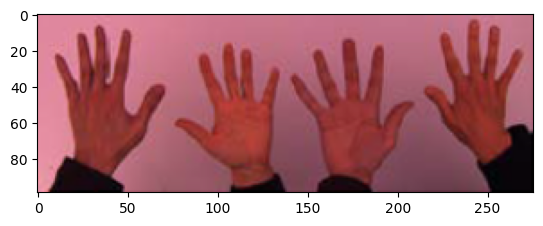

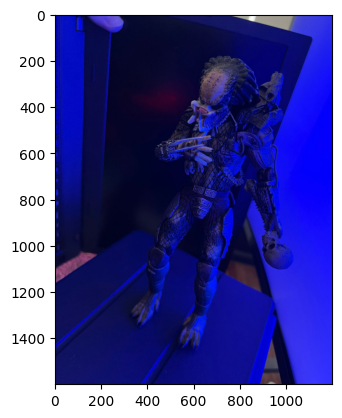

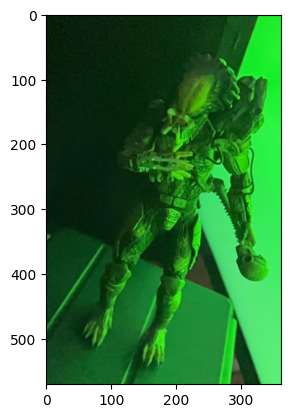

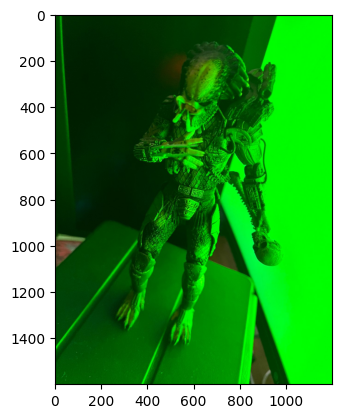

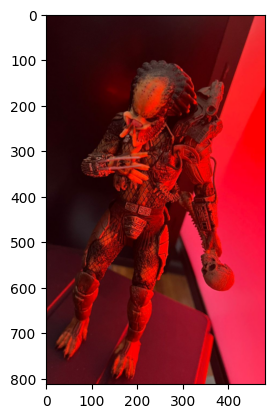

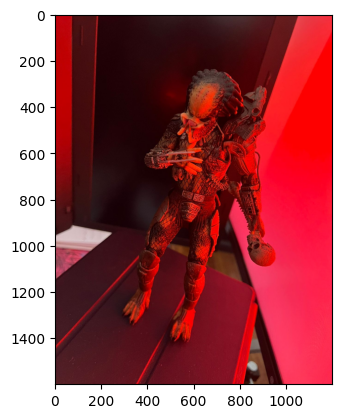

In [242]:
#Levantamos con OpenCV las 3 imagenes para aplicar White Patch y pasamos de BGR a RGB

img_wp1 = cv.imread('white_patch/test_blue.png')
img_wp1 = cv.cvtColor(img_wp1, cv.COLOR_BGR2RGB)
plt.imshow(img_wp1)
plt.show()
img_wp2 = cv.imread('white_patch/test_green.png')
img_wp2 = cv.cvtColor(img_wp2, cv.COLOR_BGR2RGB)
plt.imshow(img_wp2)
plt.show()
img_wp3 = cv.imread('white_patch/test_red.png')
img_wp3 = cv.cvtColor(img_wp3, cv.COLOR_BGR2RGB)
plt.imshow(img_wp3)
plt.show()
img_wp4 = cv.imread('white_patch/wp_blue.jpg')
img_wp4 = cv.cvtColor(img_wp4, cv.COLOR_BGR2RGB)
plt.imshow(img_wp4)
plt.show()
img_wp5 = cv.imread('white_patch/wp_green.png')
img_wp5 = cv.cvtColor(img_wp5, cv.COLOR_BGR2RGB)
plt.imshow(img_wp5)
plt.show()
img_wp6 = cv.imread('white_patch/wp_green2.jpg')
img_wp6 = cv.cvtColor(img_wp6, cv.COLOR_BGR2RGB)
plt.imshow(img_wp6)
plt.show()
img_wp7 = cv.imread('white_patch/wp_red.png')
img_wp7 = cv.cvtColor(img_wp7, cv.COLOR_BGR2RGB)
plt.imshow(img_wp7)
plt.show()
img_wp8 = cv.imread('white_patch/wp_red2.jpg')
img_wp8 = cv.cvtColor(img_wp8, cv.COLOR_BGR2RGB)
plt.imshow(img_wp8)
plt.show()


In [270]:
#definimos una función para implementar algoritmo de White Patch

def white_patch1(input_image:np.ndarray) -> np.ndarray:
    """
    Toma como parámetro de entrada una imagen RGB y aplica White Patch, devuelve una imagen transformada
    """
    #aplicamos operaciones de numpy para evitar loops reduciendo los tiempos de ejecución
    r_max = np.amax(input_image[:,:,0])
    g_max = np.amax(input_image[:,:,1])
    b_max = np.amax(input_image[:,:,2])
    print("Maximos Canales:", r_max, g_max, b_max)
    img_wp = cv.merge([np.uint8(input_image[:,:,0] * (255/r_max)), np.uint8(input_image[:,:,1] * (255/g_max)), np.uint8(input_image[:,:,2] * (255/b_max)) ])
    print(img_wp.shape)
    plt.imshow(img_wp)
    plt.show()
    
    return img_wp
    

In [321]:
def white_patch2(input_image:np.ndarray) -> np.ndarray:
    """
    Toma como parámetro de entrada una imagen RGB y aplica White Patch, devuelve una imagen transformada
    """
    #aplicamos operaciones de numpy para evitar loops reduciendo los tiempos de ejecución
    #Calculamos el maximo de cada canal con el percentil 95 
    r_max = np.percentile(input_image[:,:,0], 100)
    g_max = np.percentile(input_image[:,:,1], 100)
    b_max = np.percentile(input_image[:,:,2], 100)
    print("Maximos Canales:", r_max, g_max, b_max)
    img_wp = cv.merge([np.uint8(input_image[:,:,0] * (255/r_max)), np.uint8(input_image[:,:,1] * (255/g_max)), np.uint8(input_image[:,:,2] * (255/b_max))])
    print(img_wp.shape)
    plt.imshow(img_wp)
    plt.show()
    
    return img_wp

In [331]:
def white_patch3(input_image:np.ndarray) -> np.ndarray:
    """
    Toma como parámetro de entrada una imagen RGB y aplica White Patch, devuelve una imagen transformada
    """
    #aplicamos operaciones de numpy para evitar loops reduciendo los tiempos de ejecución
    #Calculamos el maximo de cada canal con el percentil 95 
    r_max = np.percentile(input_image[:,:,0], 90)
    g_max = np.percentile(input_image[:,:,1], 90)
    b_max = np.percentile(input_image[:,:,2], 90)
    print("Maximos Canales:", r_max, g_max, b_max)
    img_wp = cv.merge([input_image[:,:,0] * (255/r_max), input_image[:,:,1] * (255/g_max), input_image[:,:,2] * (255/b_max)])
    img_wp_norm = np.uint8(cv.normalize(img_wp, 0, 255))
    print(img_wp_norm.shape)
    plt.imshow(img_wp_norm)
    plt.show()
    
    return img_wp_norm

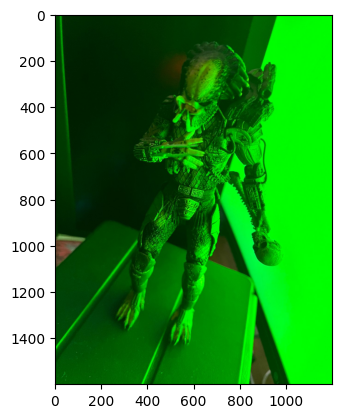

In [317]:
plt.imshow(img_wp6)

Maximos Canales: 170.0 255.0 172.0
(1600, 1200, 3)


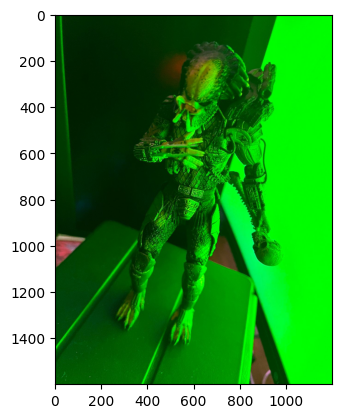

array([[[  3,  74,   1],
        [  0,  70,   0],
        [  0,  69,   0],
        ...,
        [  0, 254,   0],
        [  0, 253,   0],
        [  0, 253,   0]],

       [[  3,  74,   1],
        [  0,  70,   0],
        [  0,  69,   0],
        ...,
        [  0, 254,   0],
        [  0, 253,   0],
        [  0, 253,   0]],

       [[  3,  74,   1],
        [  0,  71,   0],
        [  0,  70,   0],
        ...,
        [  0, 254,   0],
        [  0, 253,   0],
        [  0, 253,   0]],

       ...,

       [[  4,  97,   4],
        [  4,  97,   4],
        [  0,  92,   0],
        ...,
        [  0, 252,   0],
        [  0, 251,   0],
        [  0, 251,   0]],

       [[  4,  97,   4],
        [  7,  99,   7],
        [  1,  95,   1],
        ...,
        [  0, 253,   0],
        [  0, 252,   0],
        [  0, 252,   0]],

       [[  3,  96,   2],
        [  9, 100,   8],
        [  4,  97,   4],
        ...,
        [  0, 253,   0],
        [  0, 252,   0],
        [  0, 252,   0]]

In [327]:
white_patch2(img_wp6)

Maximos Canales: 9.0 254.0 9.0
(1600, 1200, 3)


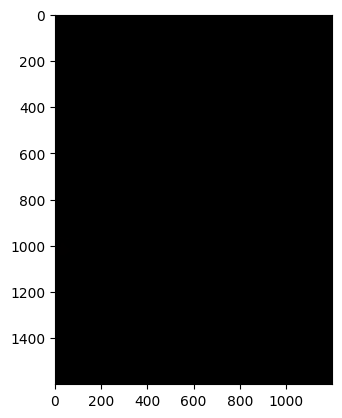

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [332]:
white_patch3(img_wp6)

In [320]:
img_wp6

array([[[  2,  74,   1],
        [  0,  70,   0],
        [  0,  69,   0],
        ...,
        [  0, 254,   0],
        [  0, 253,   0],
        [  0, 253,   0]],

       [[  2,  74,   1],
        [  0,  70,   0],
        [  0,  69,   0],
        ...,
        [  0, 254,   0],
        [  0, 253,   0],
        [  0, 253,   0]],

       [[  2,  74,   1],
        [  0,  71,   0],
        [  0,  70,   0],
        ...,
        [  0, 254,   0],
        [  0, 253,   0],
        [  0, 253,   0]],

       ...,

       [[  3,  97,   3],
        [  3,  97,   3],
        [  0,  92,   0],
        ...,
        [  0, 252,   0],
        [  0, 251,   0],
        [  0, 251,   0]],

       [[  3,  97,   3],
        [  5,  99,   5],
        [  1,  95,   1],
        ...,
        [  0, 253,   0],
        [  0, 252,   0],
        [  0, 252,   0]],

       [[  2,  96,   2],
        [  6, 100,   6],
        [  3,  97,   3],
        ...,
        [  0, 253,   0],
        [  0, 252,   0],
        [  0, 252,   0]]

In [323]:
test = 300

In [324]:
np.uint8(test)

44